In [8]:
%load_ext autoreload
%autoreload 2

# Visualize metadata

This notebook shows a few examples of how to use the `poligrain` functions to visualize CML meta data. 

*To add: plotting SML & PWS meta data*

All the functions rely on the [OpenSense](https://github.com/OpenSenseAction/OS_data_format_conventions) naming convention so that we can easily pass an `xarray.Dataset` or `DataArray` to the functions.

In [9]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import poligrain as plg

## Plotting length vs. frequency

Plot the distribution of frequency against the corresponding length for the entire CML dataset. 

In [10]:
# Load example dataset
ds_cmls = xr.open_dataset("../../tests/test_data/openMRG_CML_180minutes.nc")

Text(0.5, 1.0, 'Link length vs. frequency of the OpenMRG-CML dataset')

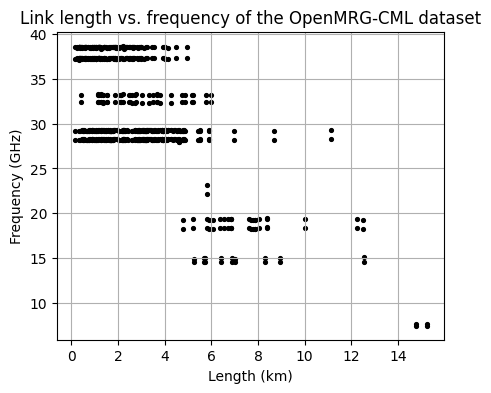

In [11]:
fig, ax = plt.subplots(figsize=(5, 4))
scatter = plg.plot_metadata.plot_len_vs_freq(
    ds_cmls.length, ds_cmls.frequency, marker_size=30, grid=True, ax=ax
)

# optionally customize output plot
ax.set_title("Link length vs. frequency of the OpenMRG-CML dataset")

### Frequency vs. length hexbin
Alternatively, plot the same as above but as a scatter density plot

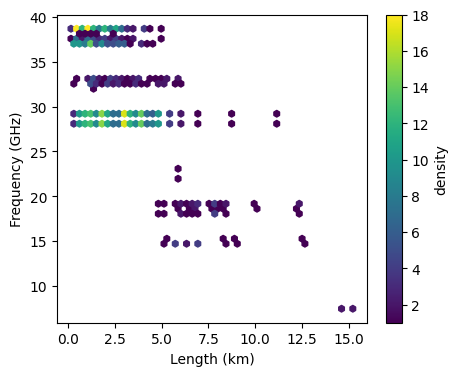

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))
hexbin = plg.plot_metadata.plot_len_vs_freq_hexbin(
    ds_cmls.length, ds_cmls.frequency, gridsize=50, ax=ax
)

plt.colorbar(hexbin, label="density")

### Frequency vs. length with margin plots

It's also possible to visualize the density of the path length vs. frequency scatter plot by adding histograms of the distribution of frequency and length in the margins. <br>
*This is similar Seaborn's jointplot, but relies only on Matplotlib.*

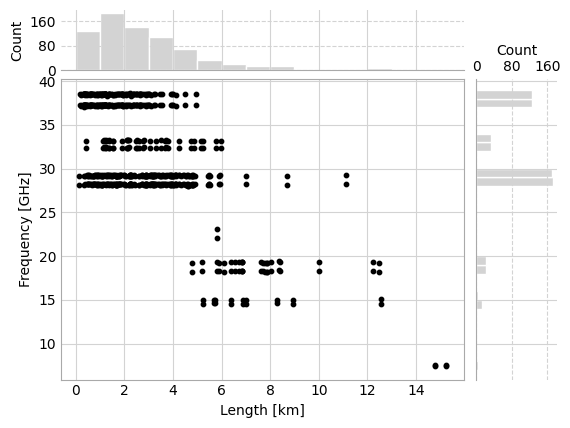

In [13]:
fig, axes = plt.subplots(
    2,
    2,
    gridspec_kw={
        "hspace": 0.05,
        "wspace": 0.05,
        "width_ratios": [5, 1],
        "height_ratios": [1, 5],
    },
)
_, _, _, scatter, _, _, _ = plg.plot_metadata.plot_len_vs_freq_jointplot(
    ds_cmls.length, ds_cmls.frequency, axes=axes
)

## Plotting distributions of frequency, length, and polarization. 

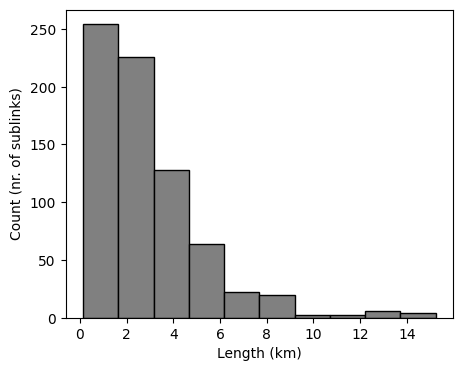

In [14]:
fig, ax = plt.subplots(figsize=(5, 4))
len_bars = plg.plot_metadata.plot_distribution(
    length=ds_cmls.length, frequency=ds_cmls.frequency, variable="length", ax=ax
)

We can also plot the distribution as a percentage. 

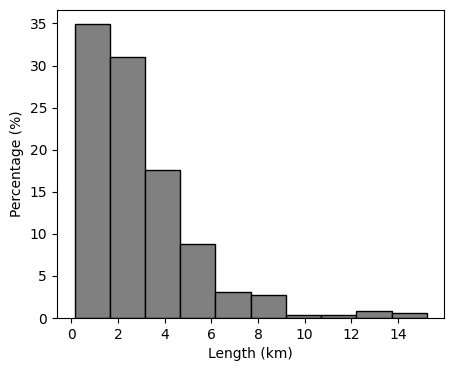

In [15]:
fig, ax = plt.subplots(figsize=(5, 4))
len_bars = plg.plot_metadata.plot_distribution(
    length=ds_cmls.length,
    frequency=ds_cmls.frequency,
    variable="length",
    percentage=True,
    ax=ax,
)

And customize the plot a bit using keyword arguments. 

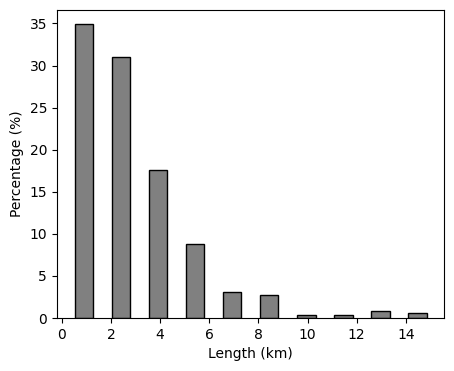

In [16]:
fig, ax = plt.subplots(figsize=(5, 4))
len_bars = plg.plot_metadata.plot_distribution(
    length=ds_cmls.length,
    frequency=ds_cmls.frequency,
    variable="length",
    percentage=True,
    ax=ax,
    rwidth=0.5,
)

We can also plot the polarization of CMLs.<br> 
In this dataset all CMLs have two sub-links, both with the same polarization, of which the vast majority is vertically polarized.  

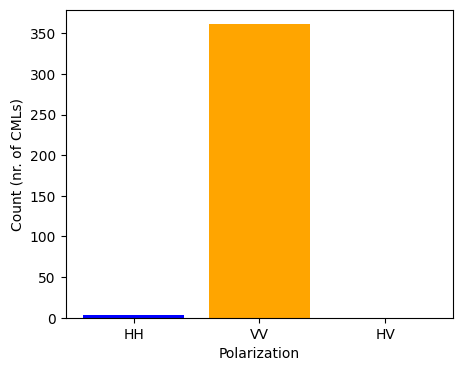

In [17]:
fig, ax = plt.subplots(figsize=(5, 4))
pol_bar = plg.plot_metadata.plot_polarization(
    ds_cmls.polarization, colors=["blue", "orange", "green"], ax=ax
)

## Plotting data availability

### Plot data availability distribution
Finally we can also take a look at the time series. Do all the CMLs have a data record for all the time periods? We can view this by plotting a histogram with the distribution of availability. 

Text(0.05, 0.95, 'Mean = 98.90%')

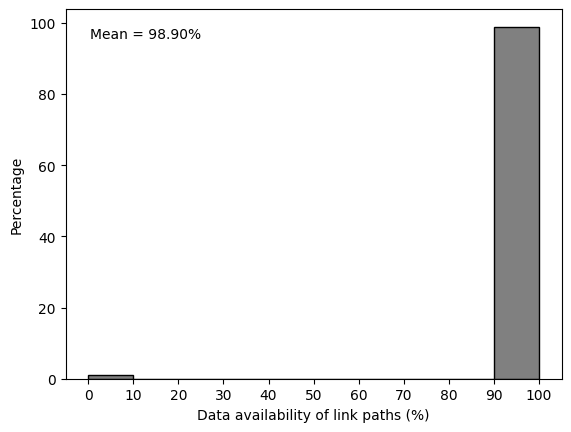

In [18]:
# take the mean over all sublinks to get the availability per link path
ds_cml_paths = ds_cmls.mean(dim="sublink_id")

fig, ax = plt.subplots()
hist, _, _ = plg.plot_metadata.plot_availability_distribution(ds_cml_paths, ax=ax)

# adapt the x-label if we choose to plot the availability of the link paths like above
ax.set_xlabel("Data availability of link paths (%)")

# we can also add some statistics to the plot, like the mean availability
availability = (
    ds_cml_paths["rsl"].count(dim="time") / ds_cml_paths.sizes["time"]
) * 100
mean_availability = np.nanmean(availability.values)
ax.annotate(
    f"Mean = {mean_availability:.2f}%",
    xy=(0.05, 0.95),
    xycoords="axes fraction",
    ha="left",
    va="top",
)

### Plot data availability time series

It's also possible to plot the availability as a time series, where we can see the number of sublinks and link paths available per time step. 

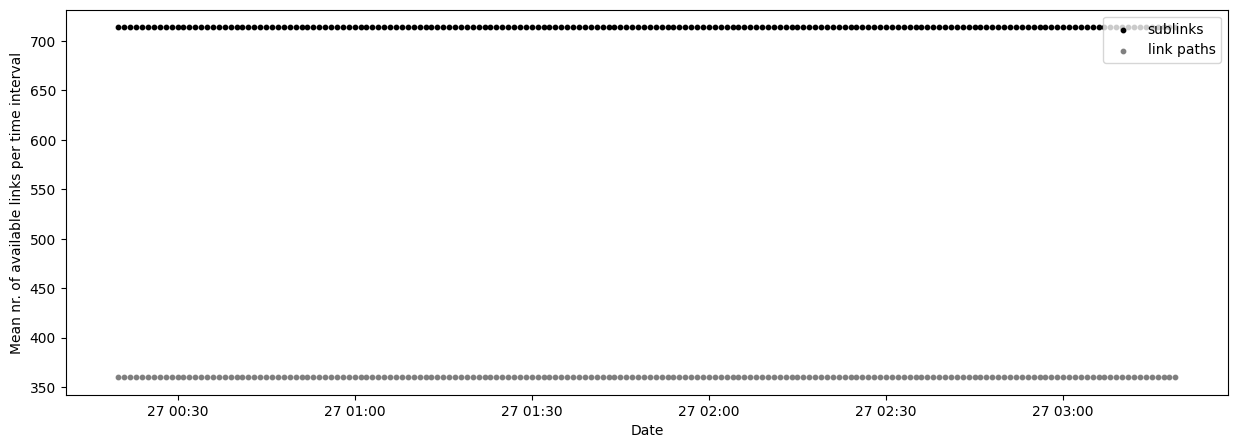

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))

scatter_sublinks, scatter_cmls = plg.plot_metadata.plot_availability_time_series(
    ds_cmls, variable="rsl", ax=ax
)

# finetuning the plotting result
ax.legend(loc=1)

If the dataset is very large we can resample the availability to a coarser time resolution with the argument ```resample_to```. *Note that this does not guarantee that the data for a link is available ALL day.*


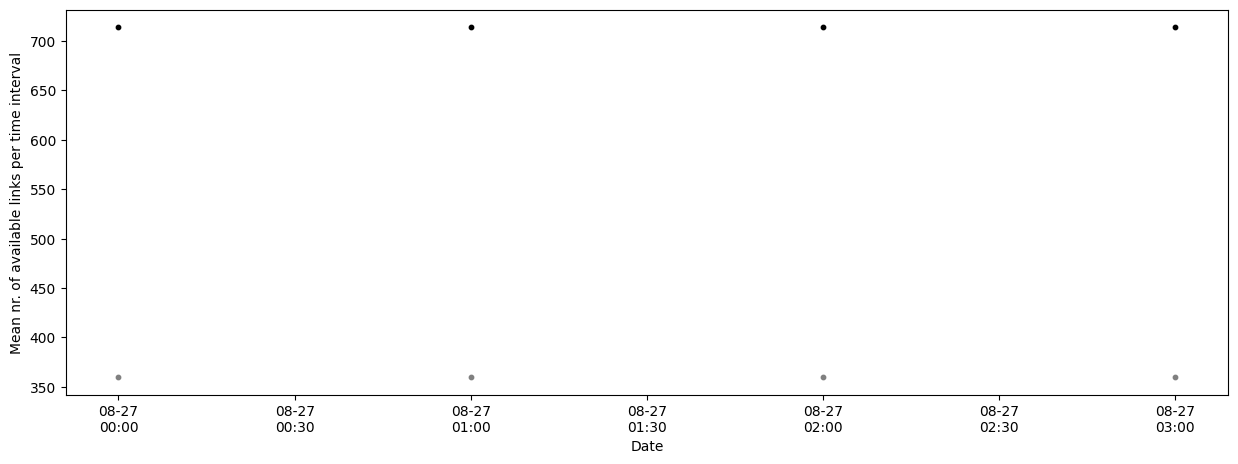

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))

scatter_sublinks, scatter_cmls = plg.plot_metadata.plot_availability_time_series(
    ds_cmls, variable="rsl", resample_to="h", ax=ax
)
# finetuning the plotting result
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d\n%H:%M"))

# In this case the resulting plot won't look very nice
# because the example data set only has a few hours of data available.

If the data set is very large and we resampled the availability, we may also want to investigate the variation in mean data availability within the resampled period by using the argument ```mean_over```. 

If we are only interested in the number of sublinks we can use the argument ```show_links``` ("both" by default).

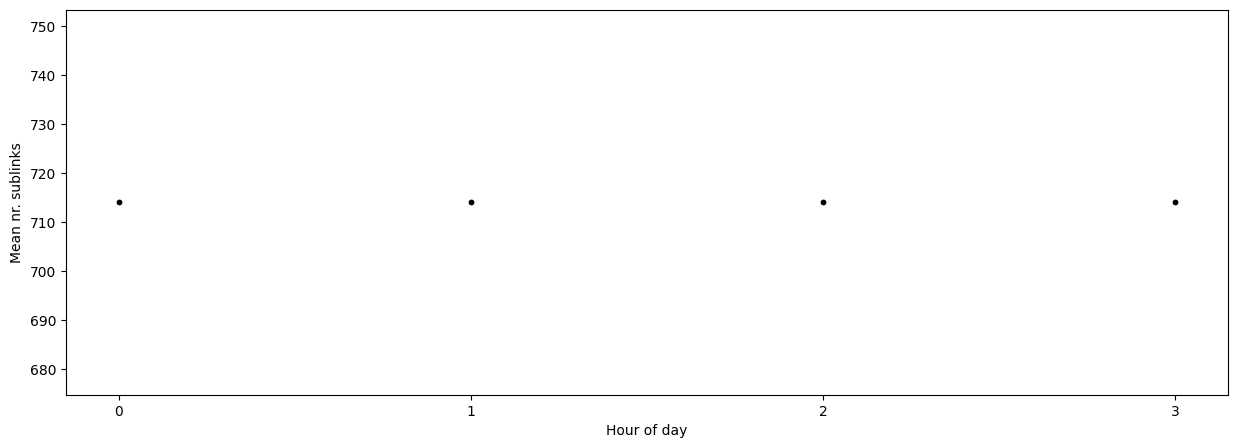

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))

scatter_sublinks, scatter_cmls = plg.plot_metadata.plot_availability_time_series(
    ds_cmls, variable="rsl", mean_over="hour", show_links="sublinks", ax=ax
)

ax.set_xlabel("Hour of day")
ax.set_ylabel("Mean nr. sublinks")

# finetuning the plotting result - force integer values only as hours on the x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))